In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D

C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\tensorflow\pyth

In [2]:
import tensorflow as tf
import keras
import os 
import time
#import cv2
import numpy as np
#import matplotlib.pyplot as plt
from keras import optimizers
import keras
import tensorflow as tf
import keras.backend as K
from sklearn.metrics import confusion_matrix, classification_report
from keras.models import load_model
from keras.models import Sequential
from keras.regularizers import l2
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
#import matplotlib.pyplot as plt
#from tqdm import tqdm
from keras.utils import np_utils
#from imgaug import augmenters as iaa    
import itertools
%matplotlib inline
#import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.optimizers import RMSprop
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.callbacks import CSVLogger
#from livelossplot import PlotLossesKeras
import os
#from classification_models.keras import Classifiers
# GPU test
from tensorflow.python.client import device_lib
np.random.seed(42)
from keras.models import load_model
# Print version
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.models import Model
from keras.layers import Input, Activation, merge, Dense, Flatten, Dropout, BatchNormalization, GlobalAveragePooling2D
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.applications.vgg16 import VGG16
from keras.regularizers import l2
import os, sys
import scipy.misc
from glob import glob
import numpy as np
import random 
import shutil 
import keras
import time
import matplotlib.pyplot as plt
from keras.layers import Dense, Input, Conv2D, Flatten, MaxPool2D, Activation,Dropout, GlobalAveragePooling2D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from keras import backend as K
from keras.models import Sequential
from keras.applications.densenet import DenseNet121
from keras.models import load_model
from keras.optimizers import Adam
from keras import optimizers
import pickle
import sys
import cv2

import tensorflow as tf


np.random.seed(1)

In [3]:
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']

tf.test.gpu_device_name()

''

In [4]:
train_dir = "F:/Train"
valid_dir = "F:/Test"

img_width, img_height = 224, 224

In [5]:
conv_base = tf.keras.applications.DenseNet169(
    include_top=False,
    weights="imagenet",
    input_shape=(img_width, img_height, 3),
)


conv_base.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "densenet169"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 112, 112, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 112, 112, 64) 256         conv

In [6]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator



datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 1664)) 
    labels = np.zeros(shape=(sample_count,12))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
 
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 34387) 
validation_features, validation_labels = extract_features(valid_dir, 8597)

Found 34387 images belonging to 12 classes.
Found 8597 images belonging to 12 classes.


In [7]:
train_features.shape

(34387, 7, 7, 1664)

In [8]:
validation_features.shape

(8597, 7, 7, 1664)

In [14]:
epochs = 100

model = Sequential()

# Fully Connected Layer
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(7,7,1664)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.50))


model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(12, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 5, 5, 32)          479264    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_4 (Dense)              (None, 12)                396       
Total params: 483,788
Trainable params: 483,788
Non-trainable params: 0
_________________________________________________________________


In [15]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_acc',save_best_only=True, mode='auto')  


from keras.optimizers import Adam
from keras.optimizers import SGD
optimizer = SGD(lr=0.001)
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['acc'])


history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

Train on 34387 samples, validate on 8597 samples
Epoch 1/100
34387/34387 [==============================] - 39s 1ms/step - loss: 1.0186 - acc: 0.7886 - val_loss: 0.9121 - val_acc: 0.7939

Epoch 00001: val_acc improved from -inf to 0.79388, saving model to model-001-0.788583-0.793882.h5
Epoch 2/100
34387/34387 [==============================] - 38s 1ms/step - loss: 0.9623 - acc: 0.7937 - val_loss: 0.9112 - val_acc: 0.7939

Epoch 00002: val_acc did not improve from 0.79388
Epoch 3/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.9446 - acc: 0.7938 - val_loss: 0.9240 - val_acc: 0.7939

Epoch 00003: val_acc did not improve from 0.79388
Epoch 4/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.9394 - acc: 0.7938 - val_loss: 0.9037 - val_acc: 0.7939

Epoch 00004: val_acc did not improve from 0.79388
Epoch 5/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.9317 - acc: 0.7938 - val_loss: 0.9012 - val_acc: 0.7939

Epoch 0

34387/34387 [==============================] - 36s 1ms/step - loss: 0.8409 - acc: 0.7943 - val_loss: 0.8959 - val_acc: 0.7939

Epoch 00043: val_acc did not improve from 0.79388
Epoch 44/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.8369 - acc: 0.7943 - val_loss: 0.9045 - val_acc: 0.7940

Epoch 00044: val_acc improved from 0.79388 to 0.79400, saving model to model-044-0.794312-0.793998.h5
Epoch 45/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.8366 - acc: 0.7942 - val_loss: 0.8928 - val_acc: 0.7939

Epoch 00045: val_acc did not improve from 0.79400
Epoch 46/100
34387/34387 [==============================] - 38s 1ms/step - loss: 0.8349 - acc: 0.7945 - val_loss: 0.8996 - val_acc: 0.7939

Epoch 00046: val_acc did not improve from 0.79400
Epoch 47/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.8325 - acc: 0.7945 - val_loss: 0.8957 - val_acc: 0.7939

Epoch 00047: val_acc did not improve from 0.79400
Epoch 48/10

34387/34387 [==============================] - 38s 1ms/step - loss: 0.7691 - acc: 0.7983 - val_loss: 0.9196 - val_acc: 0.7935

Epoch 00085: val_acc did not improve from 0.79411
Epoch 86/100
34387/34387 [==============================] - 36s 1ms/step - loss: 0.7650 - acc: 0.7990 - val_loss: 0.9196 - val_acc: 0.7939

Epoch 00086: val_acc did not improve from 0.79411
Epoch 87/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.7670 - acc: 0.7987 - val_loss: 0.9118 - val_acc: 0.7936

Epoch 00087: val_acc did not improve from 0.79411
Epoch 88/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.7625 - acc: 0.7998 - val_loss: 0.9132 - val_acc: 0.7938

Epoch 00088: val_acc did not improve from 0.79411
Epoch 89/100
34387/34387 [==============================] - 37s 1ms/step - loss: 0.7612 - acc: 0.8002 - val_loss: 0.9112 - val_acc: 0.7933

Epoch 00089: val_acc did not improve from 0.79411
Epoch 90/100
34387/34387 [==============================] - 38s

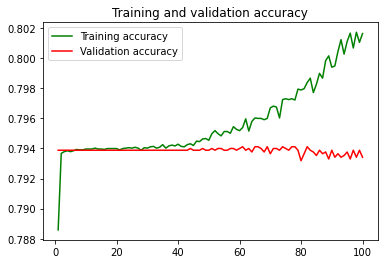

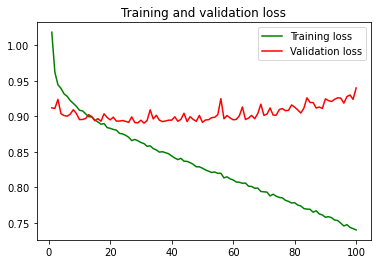

In [16]:
# Plot results
import matplotlib.pyplot as plt

acc = history.history['acc']

val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()



plt.show()

In [17]:
prediction = model.predict(validation_features)

In [18]:
prediction.shape

(8597, 12)

In [19]:
pred = np.argmax(prediction,axis=1)
validation_labels = np.argmax(validation_labels,axis=1)

In [20]:
target = ['Air-trapping','Aortic-elongation','COPD Signs','Calcified Granuloma','Callus Rib Fracture','Hiatal Hernia','Kyphosis','Laminar Atelectasis','Normal','Pleural Effusion','Scoliosis','Vascular Hilar Enlargement']
print(classification_report(validation_labels,pred,target_names=target))

                            precision    recall  f1-score   support

              Air-trapping       0.00      0.00      0.00       136
         Aortic-elongation       0.00      0.00      0.00       147
                COPD Signs       0.00      0.00      0.00       679
       Calcified Granuloma       0.00      0.00      0.00        68
       Callus Rib Fracture       0.00      0.00      0.00        66
             Hiatal Hernia       0.00      0.00      0.00        56
                  Kyphosis       0.00      0.00      0.00        35
       Laminar Atelectasis       0.00      0.00      0.00        95
                    Normal       0.79      1.00      0.88      6825
          Pleural Effusion       0.00      0.00      0.00        79
                 Scoliosis       0.38      0.01      0.02       352
Vascular Hilar Enlargement       0.00      0.00      0.00        59

                  accuracy                           0.79      8597
                 macro avg       0.10      0.0

C:\Users\NSU\anaconda3\envs\padchest\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
